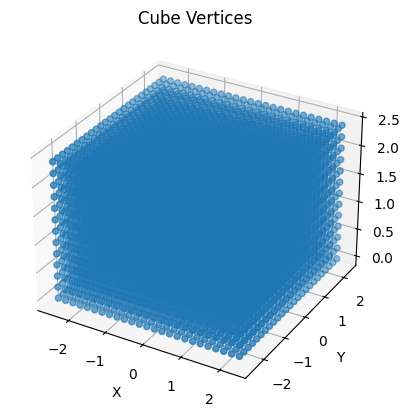

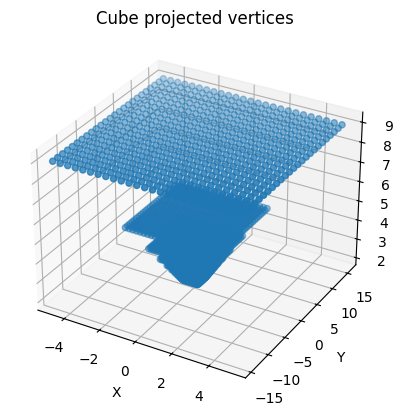

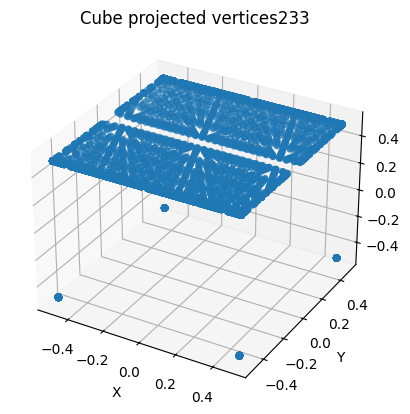

In [31]:
import torch
import numpy as np
import math
def focal2fov(focal, pixels):
    return 2*math.atan(pixels/(2*focal))

def projection(pts : torch.Tensor, H, W, Fx, Fy, w2c, near, far, dataset_type : str, z_sign = 1.0) -> torch.Tensor:
    '''
    pts.shape = (n, 3) in w
    z_sign 1.0和世界坐标系手性相同，-1相反

    return:
    pts in NDC 
    '''
    IsDnerf = dataset_type !='hyper_dataset'

    if IsDnerf:
        FovY = focal2fov(Fy, H)
        FovX = focal2fov(Fx, W)
        tanHalfFovY = np.tan((FovY / 2))
        tanHalfFovX = np.tan((FovX / 2))

        top = tanHalfFovY * near
        bottom = -top
        right = tanHalfFovX * far
        left = -right

        proj = torch.zeros(4, 4, dtype=torch.double)
        z_sign = -1.0 

        proj[0, 0] = 2.0 * near / (right - left)
        proj[1, 1] = 2.0 * near / (top - bottom)
        proj[0, 2] = (right + left) / (right - left)
        proj[1, 2] = (top + bottom) / (top - bottom)
        proj[3, 2] = z_sign
        proj[2, 2] = z_sign * far / (far - near)
        proj[2, 3] = -(far * near) / (far - near)

        t = torch.cat((pts, torch.ones(pts.shape[0], 1)), dim=1).T
        t =  torch.matmul(w2c, t)
        clip_pts = torch.matmul(proj, t).T 

        return clip_pts[:, :3]  / clip_pts[:, 3].reshape(-1, 1)
    if not IsDnerf:
        pass

length = 5.0
step = 0.2

# 生成 x、y、z 坐标轴上的网格点
x, y, z = np.meshgrid(np.arange(-length/2, length/2, step),
                       np.arange(-length/2, length/2, step),
                       np.arange(0.0, length/2, step))

x = x.flatten()
y = y.flatten()
z = z.flatten()

vertices = np.vstack((x, y, z)).T

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制顶点
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('Cube Vertices')

plt.show()

w2c = torch.tensor([[1, 0, 0, 0],
                    [0, 1, 0, 0],
                    [0, 0, 1, 0],
                    [0, 0, 0, 1]], dtype=torch.double)
projected_vertices = projection(torch.tensor(vertices), 8, 8, 5, 5, w2c, 1, 3, 'dnerf_dataset').numpy()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制顶点
ax.scatter(projected_vertices[:, 0], projected_vertices[:, 1], projected_vertices[:, 2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('Cube projected vertices')

plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cliped = torch.clamp( torch.tensor(projected_vertices),min=-0.5,max = 0.5).numpy()
ax.scatter(cliped[:, 0], cliped[:, 1], cliped[:, 2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('Cube projected vertices233')

plt.show()

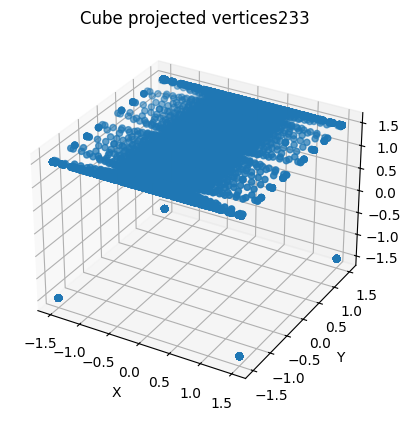

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制顶点


cliped = torch.clamp( torch.tensor(projected_vertices),min=-1.5,max = 1.5).numpy()
ax.scatter(cliped[:, 0], cliped[:, 1], cliped[:, 2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('Cube projected vertices233')

plt.show()